Solving the Sturm-Liouvillle eigenvalues problem using a computational approach for any quantum potential:

\begin{equation*}
-\frac{\hbar ^ 2}{2 m} \frac{d^2 \phi (x)}{dx ^2} + V(x) \phi (x) = E \phi(x)
\end{equation*}

\begin{equation*}
\begin{cases}

\phi (0) = 0 \\
\phi (L) = 0

\end{cases}
\end{equation*}

Once solved this equation, we can write the time evolution of the eigenfunctions of the Hamiltonian as:

\begin{equation*}
\psi (x, t) = \phi(x) e^{- \frac{i}{\hbar} t}
\end{equation*}



In [1]:
# Importing libraries
import numpy as np
from scipy.linalg import eigh_tridiagonal
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
from scipy.constants import physical_constants, hbar, e

plt.style.use('classic')

Let $ y = x / L $, adimensional variable. Thus: $ \phi (x) \rightarrow \phi(y) $

In [2]:
# Defining physics parameters
m = physical_constants["proton mass"][0] #proton mass
L = 1e-10

# Defining N, y
N = 10000
y = np.linspace(0, 1, N + 1)[1:-1]

In [3]:
# Defining the potential as V(y) = V_0 * f(y)
def f(y):
    return - np.exp(- ((y - 0.7) ** 2) / (2 * (0.025 ** 2))) + np.exp(- ((y - 0.3) ** 2) / (2 * (0.05 ** 2)))

V_0 = 1e-18
V = V_0 * f(y)

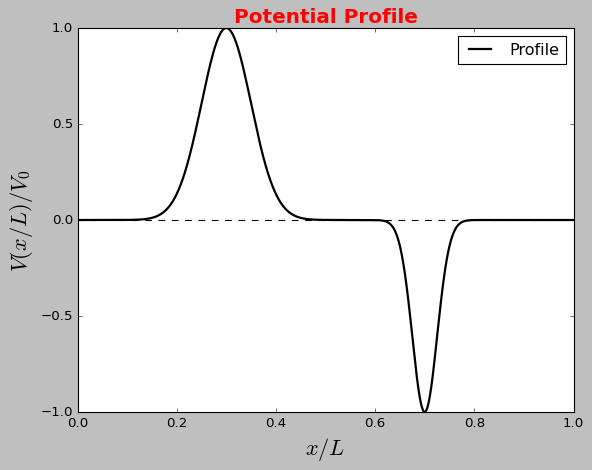

In [4]:
# Plotting the potential's profile
plt.plot(y, f(y), label= "Profile", color= "black", linewidth= 2)
plt.axhline(color= "black", linestyle= "--", linewidth= 1)
plt.title("Potential Profile", fontweight= "bold", fontsize= 18, color= "red")
plt.xlabel("$ x / L $", fontsize= 20)
plt.ylabel("$ V(x / L) / V_0 $", fontsize= 20)
plt.legend()

In [5]:

# Defining the Toeplitz matrix
diag = (N ** 2) + ((m * ((L / hbar) ** 2)) * V)
diag_off = (- (N ** 2) / 2) * np.ones(len(diag) - 1)

# Solving the problem
eigenvalues, eigenfunctions = eigh_tridiagonal(diag, diag_off)

eigenfunctions = eigenfunctions.T
E = (((hbar / L) ** 2) * (eigenvalues / m)) / e # Using eV

In [6]:
# Number of eigenfunctions to plot
n = 6

In [7]:
# Normalizing wave functions
for j in range(n):
    C = 1 / np.sqrt(trapezoid(eigenfunctions[j] ** 2, y))
    eigenfunctions[j] = C * eigenfunctions[j]

In [8]:
# Verifying
[trapezoid(eigenfunctions[j] ** 2, y) for j in range(n)]

[1.0, 1.0000000000000004, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0]

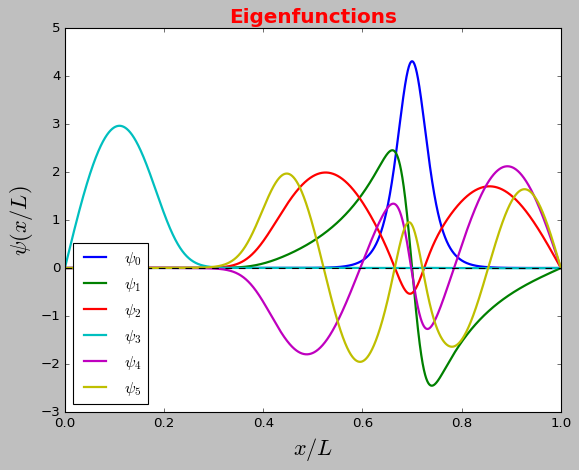

In [9]:
# Plotting the eigenfunctions
[plt.plot(y, eigenfunctions[k], label= f"$ \psi_{k} $", linewidth= 2) for k in range(n)]
plt.axhline(color= "black", linestyle= "--", linewidth= 1)
plt.title("Eigenfunctions", fontweight= "bold", fontsize= 18, color= "red")
plt.xlabel("$ x / L $", fontsize= 20)
plt.ylabel("$ \psi(x / L) $", fontsize= 20)
plt.legend(loc= "lower left")

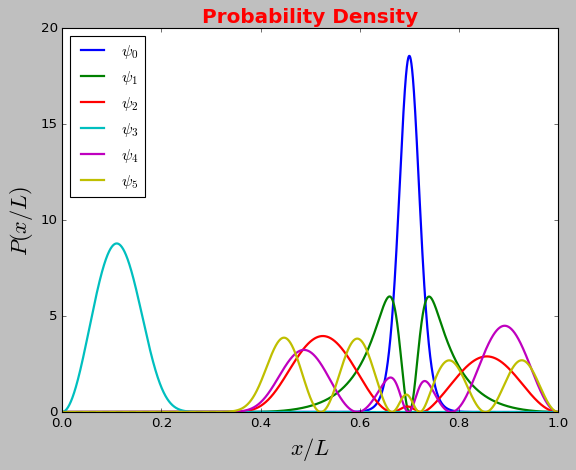

In [10]:
# Plotting the probability density
[plt.plot(y, eigenfunctions[k] ** 2, label= f"$ \psi_{k} $", linewidth= 2) for k in range(n)]
plt.axhline(color= "black", linestyle= "--", linewidth= 1)
plt.title("Probability Density", fontweight= "bold", fontsize= 18, color= "red")
plt.xlabel("$ x / L $", fontsize= 20)
plt.ylabel("$ P (x / L) $", fontsize= 20)
plt.legend(loc= "upper left")

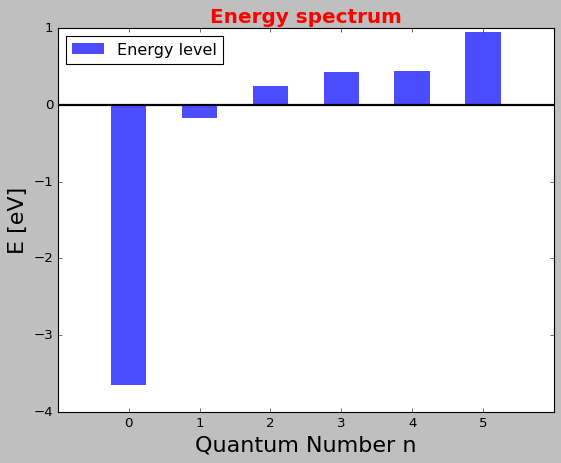

In [11]:
# Plotting the selected energy spectrum 
n_ = np.arange(0, n, 1)

plt.bar(x= n_, height= E[0 : n], width= 0.5, color= "blue", alpha= 0.7, edgecolor= "black", linewidth= 0, label= "Energy level", tick_label= [f"{j}" for j in n_])
plt.axhline(color= "black", linestyle= "-", linewidth= 2)
plt.title("Energy spectrum", fontweight= "bold", fontsize= 18, color= "red")
plt.xlabel("Quantum Number n", fontsize= 20)
plt.ylabel("E [eV]", fontsize=20)
plt.legend(loc= "upper left")

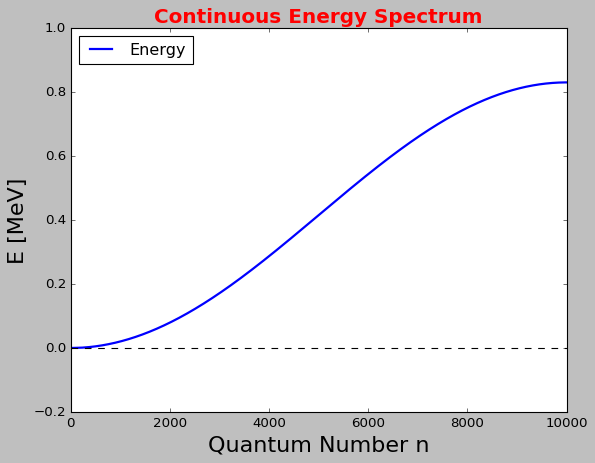

In [12]:
# Plotting all energy eigenvalues
plt.plot(E * 1e-06, label= f"Energy", linewidth= 2, color= 'blue')
plt.axhline(color= "black", linestyle= "--", linewidth= 1)
plt.title("Continuous Energy Spectrum", fontweight= "bold", fontsize= 18, color= "red")
plt.xlabel("Quantum Number n", fontsize= 20)
plt.ylabel("E [MeV]", fontsize= 20)
plt.legend(loc= "upper left")